In [1]:
import pandas as pd
import glob
import xlrd
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
all_files = glob.glob('./myCabinetExcelData*.xls')

In [5]:
all_files

['.\\myCabinetExcelData (1).xls',
 '.\\myCabinetExcelData (2).xls',
 '.\\myCabinetExcelData (3).xls',
 '.\\myCabinetExcelData (4).xls',
 '.\\myCabinetExcelData (5).xls',
 '.\\myCabinetExcelData (6).xls',
 '.\\myCabinetExcelData (7).xls',
 '.\\myCabinetExcelData (8).xls',
 '.\\myCabinetExcelData (9).xls',
 '.\\myCabinetExcelData.xls']

In [6]:
all_files_data = [] #저장할리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

In [7]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)

In [8]:
all_files_data_concat.to_csv('./riss_bigdata.csv', encoding = 'utf-8-sig', index = False)

In [9]:
all_title = all_files_data_concat['제목']

In [10]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [11]:
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [12]:
words2 = list(reduce(lambda x, y: x+y, words))

In [13]:
count = Counter(words2)

In [14]:
word_count = dict()

In [15]:
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1235
big : 1112
analytics : 115
based : 106
analysis : 98
driven : 73
system : 63
approach : 58
using : 55
issue : 50
learning : 49
model : 47
challenge : 45
application : 40
special : 39
new : 39
management : 36
framework : 36
algorithm : 35
platform : 35
science : 34
call : 33
paper : 32
era : 32
research : 31
health : 31
cloud : 30
opportunity : 28
network : 27
mining : 27
machine : 26
processing : 26
technology : 26
performance : 26
earth : 25
computing : 25
business : 24
smart : 24
perspective : 23
optimization : 23
service : 23
distributed : 23
method : 23
information : 23
use : 23
world : 23
review : 22
process : 22
intelligence : 21
real : 21


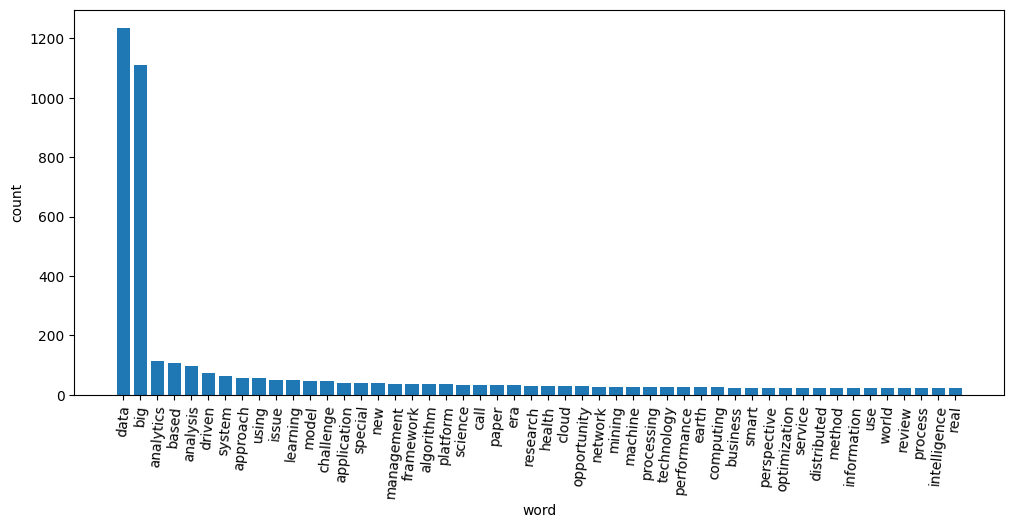

In [16]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show()

In [17]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2003,1
1,2004,1
2,2011,5
3,2012,19
4,2013,51
5,2014,123
6,2015,89
7,2016,113
8,2017,126
9,2018,116


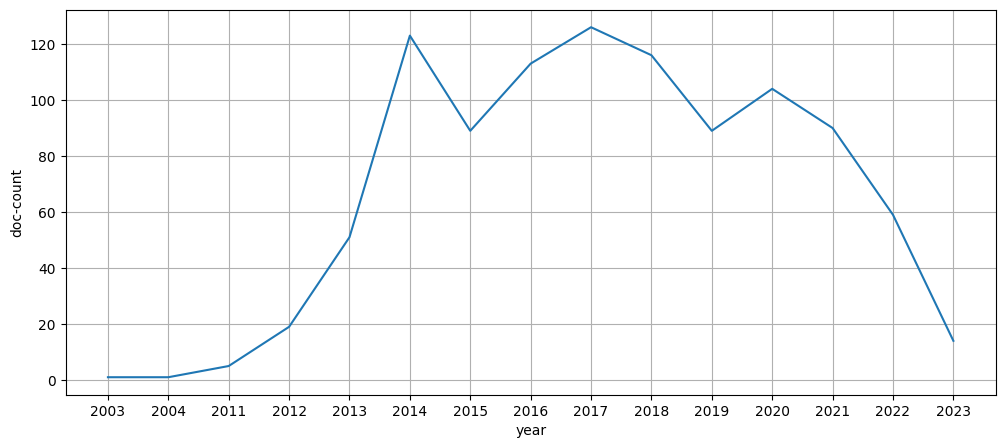

In [18]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

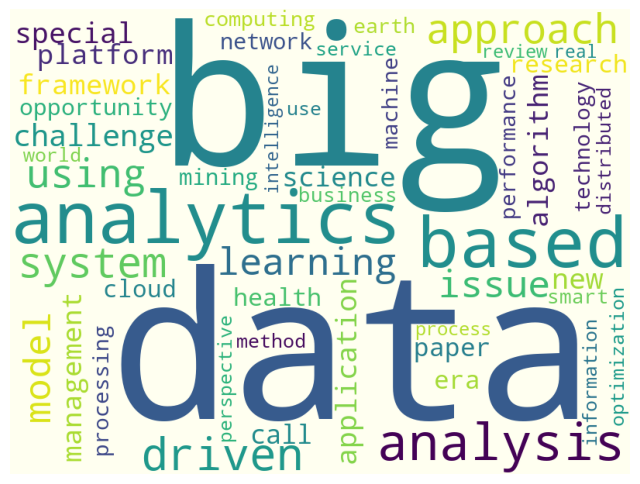

In [19]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()